# The dataset
Can be downloaded from kaggle: https://www.kaggle.com/datasets/erkamk/cat-and-dog-images-dataset/data?select=Dog+and+Cat+.png 

In [22]:
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense
from keras.preprocessing import image

In [2]:
cat4 = cv2.imread("CATS_DOGS/train/CAT/4.jpg")

In [3]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

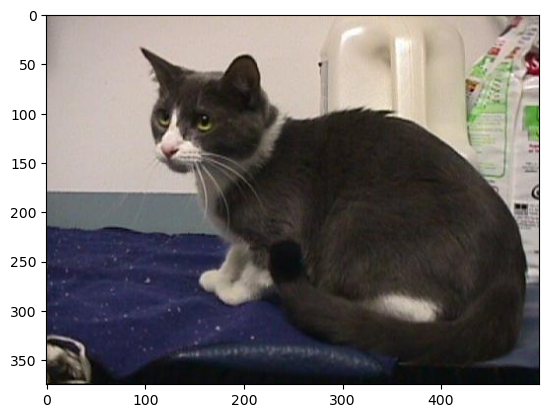

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

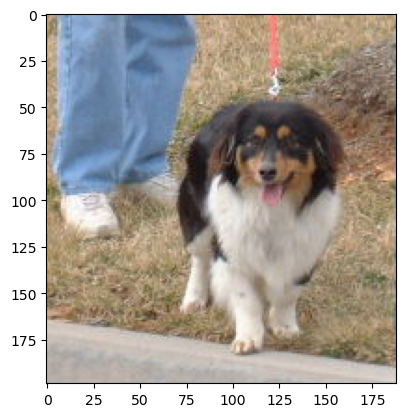

In [8]:
dog2 = cv2.imread("CATS_DOGS/train/DOG/2.jpg")
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

In [15]:
# All the images have different shapes and form
# this is why we have to prepare the data respectively
# rotation_range (randomly rotate the images)
image_generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/155, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

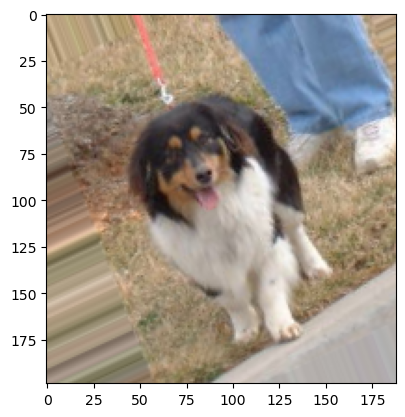

In [17]:
plt.imshow(image_generator.random_transform(dog2))

In [18]:
image_generator.flow_from_directory("CATS_DOGS/train/") # Structure must be the structure of the CATS_DOG/train! One directory per class!

Found 18743 images belonging to 2 classes.


In [23]:
input_shape = (150, 150, 3)
# create the model
model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
# add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
# add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
# add pooling
model.add(MaxPooling2D(pool_size=(2,2)))


## Flatten
model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu")) # same as model.add(Dense(128, activation="relu")) but it makes easier to swap the activation 

model.add(Dropout(0.5)) # turning off 50% of the neurons during training randomly

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


/home/peter/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Create image training generation objects for training and testing. Therefor batch size is needed
batch_size = 16

train_image_gen = image_generator.flow_from_directory("CATS_DOGS/train", 
                                                      target_size=input_shape[:2],
                                                      batch_size=batch_size,
                                                      class_mode="binary")

test_image_gen = image_generator.flow_from_directory("CATS_DOGS/test", 
                                                      target_size=input_shape[:2],
                                                      batch_size=batch_size,
                                                      class_mode="binary")

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices # Tells what class belongs to what label (one-hot encoded)

{'CAT': 0, 'DOG': 1}

In [30]:
results = model.fit(train_image_gen, epochs=10, steps_per_epoch=150, validation_data=test_image_gen, validation_steps=12)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.5505 - loss: 0.6830

/home/peter/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - accuracy: 0.5505 - loss: 0.6830 - val_accuracy: 0.5417 - val_loss: 0.6933
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 219ms/step - accuracy: 0.5693 - loss: 0.6854 - val_accuracy: 0.5417 - val_loss: 0.6907
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - accuracy: 0.5545 - loss: 0.6860 - val_accuracy: 0.6302 - val_loss: 0.6569
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 217ms/step - accuracy: 0.5960 - loss: 0.6713 - val_accuracy: 0.5885 - val_loss: 0.6482
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - accuracy: 0.5998 - loss: 0.6715 - val_accuracy: 0.6250 - val_loss: 0.6373
Epoch 6/10
 25/150 ━━━━━━━━━━━━━━━━━━━━ 27s 220ms/step - accuracy: 0.6511 - loss: 0.6303

/home/peter/.local/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 222ms/step - accuracy: 0.6382 - loss: 0.6437 - val_accuracy: 0.6406 - val_loss: 0.6594
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.6497 - loss: 0.6265 - val_accuracy: 0.5990 - val_loss: 0.6469
Epoch 8/10
122/150 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.6607 - loss: 0.6338

2024-07-14 15:24:01.995494: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 174ms/step - accuracy: 0.6615 - loss: 0.6335 - val_accuracy: 0.6927 - val_loss: 0.5817
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 33s 213ms/step - accuracy: 0.6685 - loss: 0.6168 - val_accuracy: 0.6927 - val_loss: 0.5917
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.6624 - loss: 0.6253 - val_accuracy: 0.6458 - val_loss: 0.6436
